In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils

/home/libfun/vrt/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [2]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

In [3]:
old_features = {'Electron': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [4]:
ft = set()
for f in old_features:
    ft = ft.union(set(old_features[f]))
ft = list(ft)

In [6]:
y_train = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
y_train[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [7]:
from sklearn.preprocessing import Imputer

to_log = ['MuonNShared',  'TrackPt', 'TrackP', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
          'TrackFitVeloNDoF', 'TrackFitTChi2']

to_log_negative = ['MuonMuLL', 'RichDLLbt', 'RichDLLe', 
                   'RichDLLp', 'RichDLLmu', 'RichDLLk']

# CaloChargedSpd - 1 or -999
# CombDLLpi, RichDLLpi  0 or -999

def log1p_negative(array):
    negative = array < 0
    array = np.log1p(np.abs(array))
    array[negative] *= -1
    return array

def preprocess_data(X):
    #X.loc[:, 'CaloChargedSpd'].replace(-999, 0, inplace=1)
    X.loc[:, 'RichDLLpi'].replace(-999, 1, inplace=1)
    
    X[X == -999] = np.nan

    #imp = Imputer()
    #X = imp.fit_transform(X)
    #X = pd.DataFrame(data=X, columns=X_columns)

    for col in to_log:
        X[col] = np.log1p(X[col])
    for col in to_log_negative:
        X[col] = log1p_negative(X[col])
    return X

train = preprocess_data(train)
test = preprocess_data(test)

In [8]:
mn = train[ft].mean()
X_train = train[ft].fillna(mn)
X_test = test[ft].fillna(mn)

In [9]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

target = np.abs(y_train)

target_m = np.zeros(target.shape)
target_m[target == pid_dict['Ghost']] = 0
target_m[target == pid_dict['Muon']] = 1
target_m[target == pid_dict['Pion']] = 2
target_m[target == pid_dict['Kaon']] = 3
target_m[target == pid_dict['Proton']] = 4
target_m[target == pid_dict['Electron']] = 5

y_train = target_m.copy()

y_test = np.abs(y_test)

target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0
target_m[y_test == pid_dict['Muon']] = 1
target_m[y_test == pid_dict['Pion']] = 2
target_m[y_test == pid_dict['Kaon']] = 3
target_m[y_test == pid_dict['Proton']] = 4
target_m[y_test == pid_dict['Electron']] = 5

y_test = target_m.copy()

In [10]:
feat_uni = ft
train = X_train
test = X_test

ndict = {'Ghost': 0, 'Muon': 1, 'Pion': 2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}

train_w = np.ones(train.shape[0])
for p in ndict.keys():
    pw = train.shape[0]/(y_train == ndict[p]).sum()
    train_w[y_train == ndict[p]] *= pw
    
test_w = np.ones(test.shape[0])
for p in ndict.keys():
    pw = test.shape[0]/(y_test == ndict[p]).sum()
    test_w[y_test == ndict[p]] *= pw

dtrain = xgb.DMatrix(train[feat_uni], label=y_train, feature_names=feat_uni, weight=train_w)
dtest = xgb.DMatrix(test[feat_uni], feature_names=feat_uni)    

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train[ft])
X_test_sc = sc.transform(X_test[ft])

lr = LogisticRegression(C=1., penalty='l2', random_state=0,
                            class_weight='balanced')
lr.fit(X_train_sc, y_train)
    
preds = lr.predict_proba(X_test_sc)

In [15]:
pd.DataFrame(data=preds, columns=['Ghost', 'Muon', 'Pion', 
                                  'Kaon', 'Proton', 'Electron']).to_csv('preds_logreg.csv')

In [11]:
prs = pd.read_csv('preds_logreg.csv', index_col=0)

In [12]:
prs.head()

,Ghost,Muon,Pion,Kaon,Proton,Electron
0,0.012465,0.018723,0.109879,0.406017,0.415614,0.037302
1,0.022436,0.000130,0.015560,0.509452,0.443439,0.008983
2,0.053077,0.002975,0.910660,0.008019,0.010186,0.015083
3,0.133931,0.007639,0.673207,0.013974,0.024132,0.147117
4,0.002738,0.001200,0.968721,0.006635,0.010026,0.010680


In [13]:
ghost_preds = prs.Ghost.values
muon_preds = prs.Muon.values
kaon_preds = prs.Kaon.values
proton_preds = prs.Proton.values
ele_preds = prs.Electron.values
pion_preds = prs.Pion.values

pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

In [14]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')
y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0
target_m[y_test == pid_dict['Muon']] = 1
target_m[y_test == pid_dict['Pion']] = 2
target_m[y_test == pid_dict['Kaon']] = 3
target_m[y_test == pid_dict['Proton']] = 4
target_m[y_test == pid_dict['Electron']] = 5

preds = np.zeros((len(ele_preds), 6))
preds[:, 0] = ghost_preds
preds[:, 1] = muon_preds
preds[:, 2] = pion_preds
preds[:, 3] = kaon_preds
preds[:, 4] = proton_preds
preds[:, 5] = ele_preds

label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

In [15]:
from sklearn.metrics import roc_curve

def labels_transform(labels):
    """
    Transform labels from shape = [n_samples] to shape = [n_samples, n_classes]
    :param labels: array
    :return: ndarray, transformed labels
    """
    classes = np.unique(labels)

    new_labels = np.zeros((len(labels), len(classes)))
    for cl in classes:
        new_labels[:, cl] = (labels == cl) * 1.

    return new_labels

def get_roc_curves(labels, probas, curve_labels, save_path=None, show=True):
    """
    Creates roc curve for each class vs rest.
    :param labels: array, shape = [n_samples], labels for the each class 0, 1, ..., n_classes - 1.
    :param probas: ndarray, shape = [n_samples, n_classes], predicted probabilities.
    :param curve_labels: array of strings , shape = [n_classes], labels of the curves.
    :param save_path: string, path to a directory where the figure will saved. 
     If None the figure will not be saved.
    :param show: boolean, if true the figure will be displayed.
    """
    labels = labels_transform(labels)
    weights = np.zeros(len(labels))

    for num in range(labels.shape[1]):
        weights += 0.1 * (labels[:, num] == 1) * len(labels) / ((labels[:, num] == 1).sum())

    plt.figure(figsize=(10,7))
    for num in range(probas.shape[1]):

        roc_auc = roc_auc_score(labels[:, num], probas[:, num], sample_weight=weights)
        fpr, tpr, _ = roc_curve(labels[:, num], probas[:, num], sample_weight=weights)

        plt.plot(tpr, 1.-fpr, label=curve_labels[num] + ', %.5f' % roc_auc, linewidth=2)

    plt.title("ROC Curves LogReg", size=15)
    plt.xlabel("Signal efficiency", size=15)
    plt.ylabel("Background rejection", size=15)
    plt.legend(loc='best',prop={'size':15}, frameon=True, shadow=True, framealpha=1.)
    plt.xticks(np.arange(0, 1.01, 0.1), size=15)
    plt.yticks(np.arange(0, 1.01, 0.1), size=15)
    
    if save_path != None:
        plt.savefig(save_path + "/overall_roc_auc.png")

    if show == True:
        plt.show()

    plt.clf()
    plt.close()

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


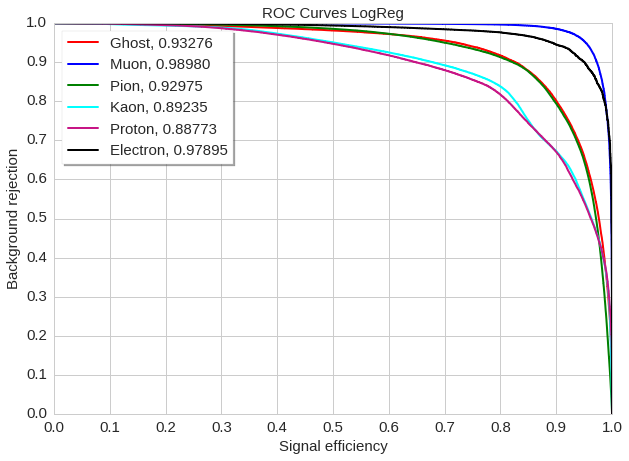

In [16]:
get_roc_curves(target_m, preds, label_list)

/home/libfun/pid/utils.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


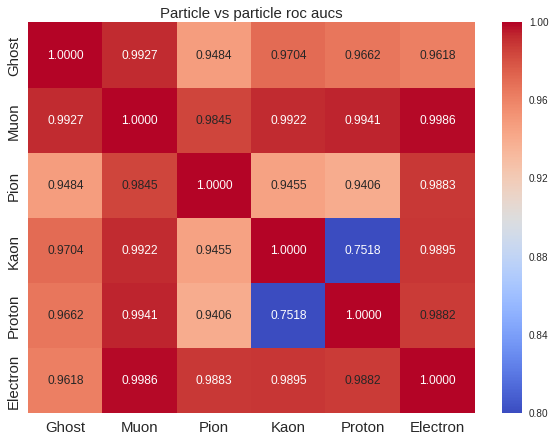

In [17]:
mat = utils.get_roc_auc_matrix(target_m, preds, label_list)

In [18]:
def get_roc_auc_matrix(labels, probas, axis_labels, save_path=None, show=True):
    """
    Calculate class vs class roc aucs matrix.
    :param labels: array, shape = [n_samples], labels for the each class 0, 1, ..., n_classes - 1.
    :param probas: ndarray, shape = [n_samples, n_classes], predicted probabilities.
    :param axis_labels: array of strings , shape = [n_classes], labels of the curves.
    :param save_path: string, path to a directory where the figure will saved.
     If None the figure will not be saved.
    :param show: boolean, if true the figure will be displayed.
    :return: pandas.DataFrame roc_auc_matrix
    """
    labels = labels_transform(labels)

    # Calculate roc_auc_matrices
    roc_auc_matrices = np.ones((probas.shape[1],probas.shape[1]))

    for first in range(probas.shape[1]):
        for second in range(probas.shape[1]):
            if first == second:
                continue
            weights = ((labels[:, first] != 0) + (labels[:, second] != 0)) * 1.
            roc_auc = roc_auc_score(labels[:, first], probas[:, first]/probas[:, second], sample_weight=weights)
            roc_auc_matrices[first, second] = roc_auc


    # Save roc_auc_matrices
    matrix = pd.DataFrame(columns=axis_labels, index=axis_labels)

    for num in range(len(axis_labels)):
        matrix[axis_labels[num]] = roc_auc_matrices[num, :]

    if save_path != None:
        matrix.to_csv(save_path + "/class_vs_class_roc_auc_matrix.csv")

    # Plot roc_auc_matrices
    #inline_rc = dict(mpl.rcParams)
    #import seaborn as sns
    plt.figure(figsize=(10,7))
    sns.set()
    ax = plt.axes()
    sns.heatmap(matrix, vmin=mat.min().min(), vmax=mat[mat != 1.].max().max(), 
                annot=True, fmt='.4f', ax=ax)
    plt.title('Particle vs particle roc aucs LogReg', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)

    if save_path != None:
        plt.savefig(save_path + "/class_vs_class_roc_auc_matrix.png")

    if show == True:
        plt.show()

    plt.clf()
    plt.close()

    #mpl.rcParams.update(mpl.rcParamsDefault)
    #mpl.rcParams.update(inline_rc)

    return matrix

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


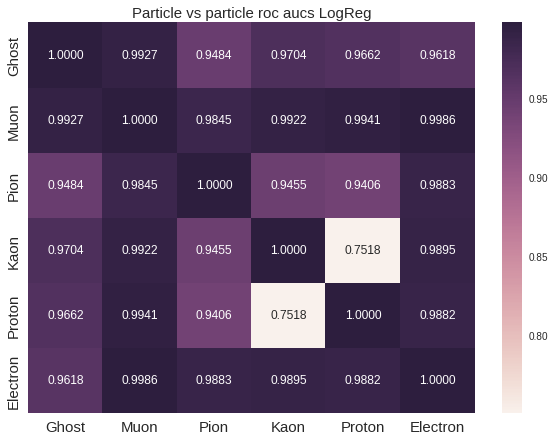

In [19]:
mat = get_roc_auc_matrix(target_m, preds, label_list)

In [20]:
mat

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,0.992657,0.948372,0.970437,0.966157,0.961829
Muon,0.992657,1.000000,0.984532,0.992232,0.994076,0.998599
Pion,0.948372,0.984532,1.000000,0.945513,0.940602,0.988302
Kaon,0.970437,0.992232,0.945513,1.000000,0.751766,0.989538
Proton,0.966157,0.994076,0.940602,0.751766,1.000000,0.988203
Electron,0.961828,0.998599,0.988302,0.989538,0.988203,1.000000


In [21]:
def get_roc_auc_ratio_matrix(matrix_one, matrix_two, save_path=None, show=True):
    classes = list(matrix_one.index)
    roc_auc_matrices = np.ones((len(classes), len(classes)))

    for first in range(len(classes)):
        for second in range(len(classes)):
            roc_auc_one = matrix_one.loc[classes[first], classes[second]]
            roc_auc_two = matrix_two.loc[classes[first], classes[second]]
            roc_auc_matrices[first, second] = roc_auc_one / roc_auc_two

    matrix = pd.DataFrame(columns=classes, index=classes)

    for num in range(len(classes)):
        matrix[classes[num]] = roc_auc_matrices[num, :]

    from matplotlib import cm
    inline_rc = dict(mpl.rcParams)
    import seaborn as sns
    plt.figure(figsize=(10,7))
    sns.set()
    ax = plt.axes()
    sns.heatmap(matrix, vmin=0.9, vmax=1.1, annot=True, fmt='.4f', ax=ax, cmap=cm.seismic)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('Particle vs particle roc aucs ratio', size=15)

    if show == True:
        plt.show()

    plt.clf()
    plt.close()

    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams.update(inline_rc)

    return matrix

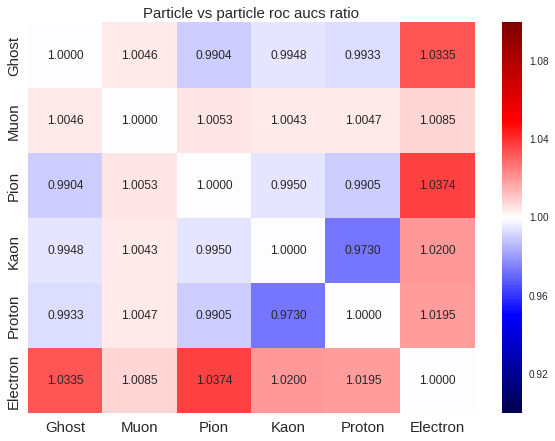

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,1.004625,0.990393,0.994840,0.993342,1.033492
Muon,1.004625,1.000000,1.005327,1.004327,1.004656,1.008465
Pion,0.990393,1.005327,1.000000,0.994979,0.990487,1.037430
Kaon,0.994840,1.004327,0.994979,1.000000,0.972981,1.019955
Proton,0.993342,1.004656,0.990487,0.972981,1.000000,1.019464
Electron,1.033492,1.008465,1.037430,1.019955,1.019464,1.000000


In [22]:
mat2 = pd.read_csv('./baseline_mat.csv', index_col='Unnamed: 0')
utils.get_roc_auc_ratio_matrix(mat, mat2)

In [23]:
from rep.utils import get_efficiencies
from rep.plotting import ErrorPlot

def flatness_p_figure(label, proba, track_p, track_name, particle_name, save_path=None, show=False):
    thresholds = np.percentile(proba[label], 100 - np.array([20, 50, 80]))

    eff = get_efficiencies(proba[label],
                           1/track_p[label],
                           bins_number=30,
                           errors=True,
                           ignored_sideband=.05,
                           thresholds=thresholds)

    
    for i in thresholds:
        eff[i] = (eff[i][0], 100. * eff[i][1], 100. * eff[i][2], eff[i][3])
    
    ax = plt.subplot(111)
    
    for i in thresholds:
        ax.errorbar(eff[i][0], eff[i][1], yerr=eff[i][2], xerr=eff[i][3], 
                     elinewidth=1, capsize=2, fmt='.', capthick=1)

    labels = ['Eff = 20 %',
              'Eff = 50 %',
              'Eff = 80 %']
    plt.legend(labels, loc='best',prop={'size':12}, frameon=True, shadow=True, framealpha=1., ncol=1)
    plt.xlabel('1 / '+ track_name + ' ' + particle_name + ' Momentum', size=15)
    plt.ylabel('Efficiency / %', size=15)
    plt.ylim = (0, 100)
    ax.set_ylim([0, 100])
    plt.title('Flatness TrackP' + track_name + ' ' + particle_name, size=15)
    plt.show()
    
def flatness_pt_figure(label, proba, track_pt, track_name, particle_name, save_path=None, show=False):
    thresholds = np.percentile(proba[label], 100 - np.array([20, 50, 80]))

    eff = get_efficiencies(proba[label],
                           1/track_pt[label],
                           bins_number=30,
                           errors=True,
                           ignored_sideband=.05,
                           thresholds=thresholds)

    for i in thresholds:
        eff[i] = (eff[i][0], 100. * eff[i][1], 100. * eff[i][2], eff[i][3])

    ax = plt.subplot(111)
    
    for i in thresholds:
        ax.errorbar(eff[i][0], eff[i][1], yerr=eff[i][2], xerr=eff[i][3], 
                     elinewidth=1, capsize=2, fmt='.', capthick=1)

    labels = ['Eff = 20 %',
              'Eff = 50 %',
              'Eff = 80 %']
    plt.legend(labels, loc='best',prop={'size':12}, frameon=True, shadow=True, framealpha=1., ncol=1)
    plt.xlabel('1 / '+ track_name + ' ' + particle_name + ' Transverse Momentum', size=15)
    plt.ylabel('Efficiency / %', size=15)
    plt.ylim = (0, 100)
    ax.set_ylim([0, 100])
    plt.title('Flatness TrackPt' + track_name + ' ' + particle_name, size=15)
    plt.show()

In [24]:
preds_dict = {'Electron': ele_preds,
              'Proton': proton_preds,
              'Kaon': kaon_preds,
              'Muon': muon_preds,
              'Pion': pion_preds,
              'Ghost': ghost_preds}

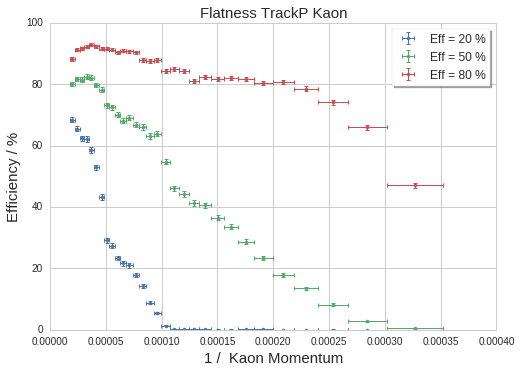

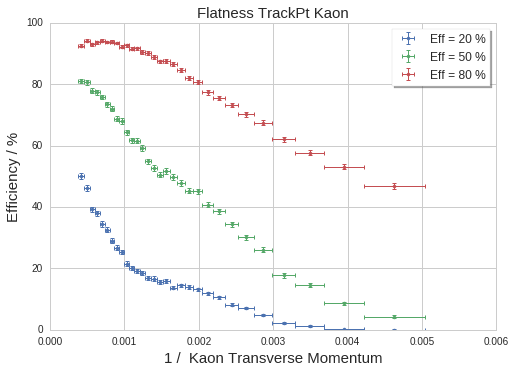

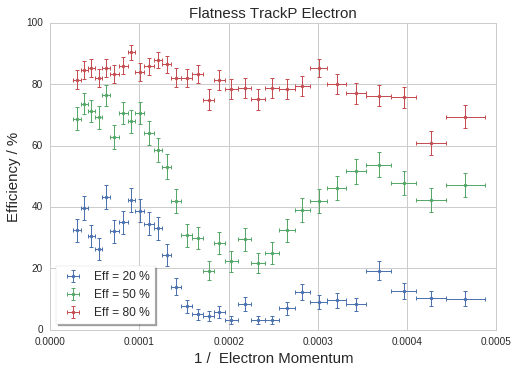

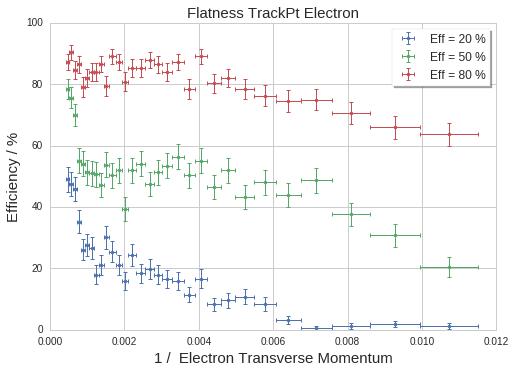

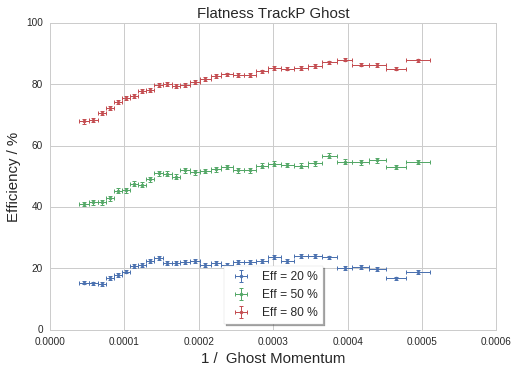

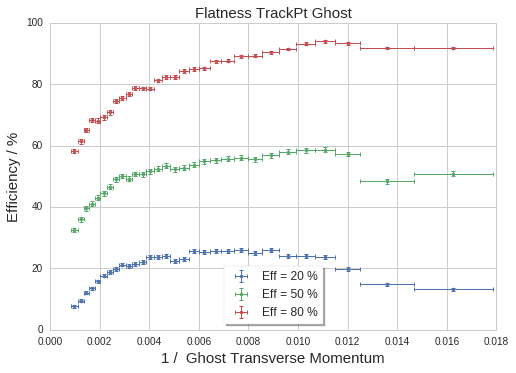

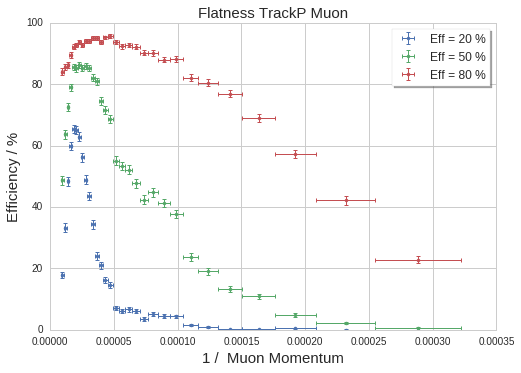

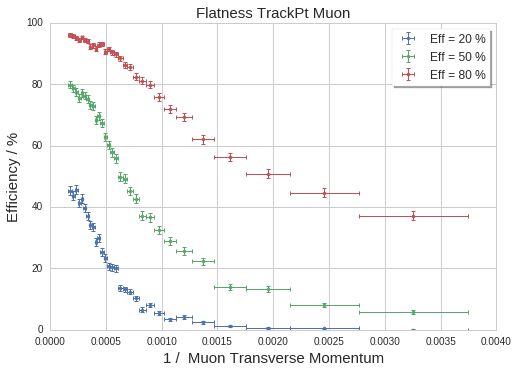

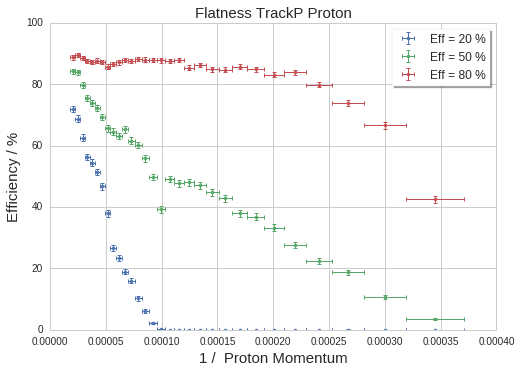

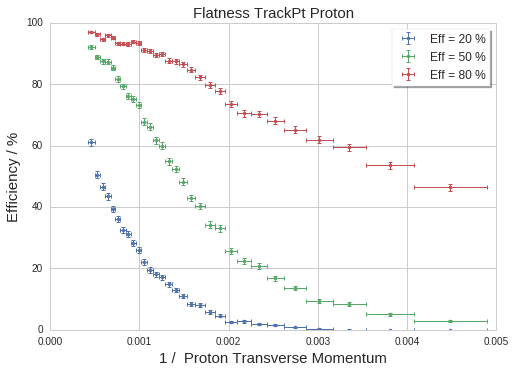

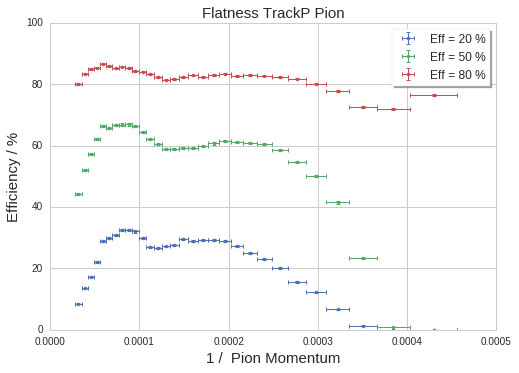

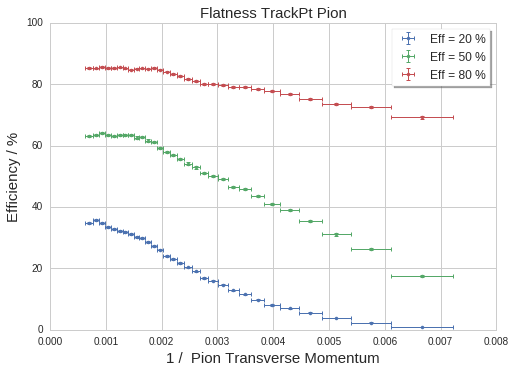

In [25]:
sns.set(style='whitegrid')
ndc = {'Ghost': 0, 'Muon': 1, 'Pion':2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}
for i in preds_dict:
    flatness_p_figure(target_m == ndc[i], preds_dict[i], test.TrackP.values, '', i)
    flatness_pt_figure(target_m == ndc[i], preds_dict[i], test.TrackPt.values, '', i)

In [33]:
from utils_new import get_flatness_table

In [34]:
fl = get_flatness_table(test, target_m, preds, label_list)

/home/libfun/pid/utils_new.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


In [35]:
fl

,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.003267,0.007933,0.000875,0.000859
Muon,0.059721,0.038114,0.000884,0.000912
Pion,0.022008,0.013955,0.000849,0.000850
Kaon,0.052016,0.035164,0.000878,0.000881
Proton,0.044647,0.051049,0.000885,0.000888
Electron,0.015748,0.013798,0.000991,0.000967


In [36]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0
for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Categorical cross-entropy:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

Avg. pairwise ROC AUC: 0.960854289719
Categorical cross-entropy: 0.632679632868
Mean flatness: 0.029784876314
